In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()  # Use this to upload the CSV file from your computer

# Load the data into a pandas DataFrame
df = pd.read_csv('/content/Cleaned_Students_Performance.csv')
df.head()


Saving Cleaned_Students_Performance.csv to Cleaned_Students_Performance (1).csv


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [ ]:
# Step 2: Load the Data
# Load the dataset
df = pd.read_csv('/content/Cleaned_Students_Performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [ ]:
# Inspect the data structure
print(df.columns)  # List column names
print(df.head())   # View the first few rows
print(df.info())   # Check data types and any missing values


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')
   gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76    

Accuracy: 97.67%


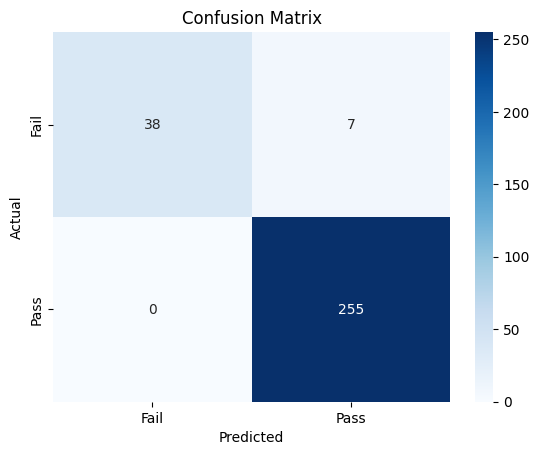

              precision    recall  f1-score   support

        Fail       1.00      0.84      0.92        45
        Pass       0.97      1.00      0.99       255

    accuracy                           0.98       300
   macro avg       0.99      0.92      0.95       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Data
df = pd.read_csv('/content/Cleaned_Students_Performance.csv')

# Step 3: Define Pass/Fail Criterion
# Assuming an average score above 50 is considered a "Pass"
df['pass_fail'] = df['average_score'].apply(lambda x: 1 if x > 50 else 0)

# Step 4: Handle Categorical Features
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['race_ethnicity', 'parental_level_of_education'], drop_first=True)

# Step 5: Split the Data
# Separate features and target variable
X = df.drop(['average_score', 'total_score', 'pass_fail'], axis=1)
y = df['pass_fail']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))




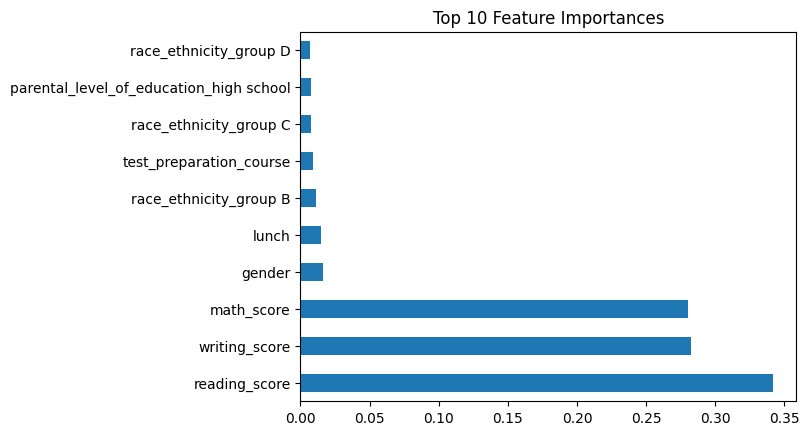

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
